# Step 0.1: Preparing Dataset for Working

**Dataset Name:** Road Accident Casualties Dataset

**Dataset Address:** https://www.kaggle.com/datasets/nezukokamaado/road-accident-casualties-dataset

In [283]:
# IMPORTINGS #

import numpy as np # linear algebra
import pandas as pd # data processing

# Data Visualizing Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
# DATASET IMPORT
path_ = "/kaggle/input/road-accident-casualties-dataset/accident data.csv"
df_ = pd.read_csv(filepath_or_buffer=path_)
df = df_.copy()

In [285]:
# SETTING UP THE OPTIONS
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [286]:
df.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.51,Darkness - lights lit,Kensington and Chelsea,-0.21,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.50,Daylight,Kensington and Chelsea,-0.17,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.52,Darkness - lighting unknown,Kensington and Chelsea,-0.21,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.50,Daylight,Kensington and Chelsea,-0.20,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.49,Darkness - lights lit,Kensington and Chelsea,-0.19,1,2,Dry,NaN,Urban,NaN,Other vehicle


# Step 0.2: Defining The Functions To Be Used in The Project

**check_df** function provides us to general picture about data.

**cat_summary** function analyses the categorical columns.

**num_summary** function analyses the numerical columns.

**grab_col_names** function detects numeric, categorical and cardinal columns based on certain operations.

**target_summary_with_cat** function averages the diffraction of classes of the categorical variable into the target variable.

**target_summary_with_num** function averages the numerical variable over the diffractions of the classes of the target variable.

**load_dataset** function loads the related dataset.

**add_random_missing_values** function add NaN values to the data randomly.)

In [287]:
def check_df(dataframe, head=5):
  print("##################### Shape #####################")
  print(dataframe.shape)
  print("##################### Types #####################")
  print(dataframe.dtypes)
  """
  print("##################### Head #####################")
  print(dataframe.head(head))
  print("##################### Tail #####################")
  print(dataframe.tail(head))
  """
  print("##################### NA #####################")
  print(dataframe.isnull().sum())
  print("##################### Quantiles #####################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [288]:
def cat_summary(dataframe, col_name: str, plot=False):
    summary_df = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                               "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})
    print(summary_df)
    print("##########################################")
    if plot == True:
      sns.countplot(x=dataframe[col_name], data=dataframe)
      plt.show(block=True)

In [289]:
def num_summary(dataframe, numerical_col, plot=False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T)
  if plot==True:
    #sns.histplot(data=dataframe, x=dataframe[numerical_col])
    dataframe[numerical_col].hist()
    plt.xlabel(numerical_col)
    plt.title(numerical_col)
    plt.show(block=True)

In [290]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        Değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        Numerik fakat kategorik olan değişkenler için sınıf eşik değeri. (threshold)
    car_th: int, float
        Kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi.
    num_cols: list
        Numerik değişken listesi.
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi.

    Notes
    ------
    cat_cols + num_cols + cat_but_car = Toplam değişken sayısı.
    num_but_cat, cat_cols'un içerisinde.
    Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car
  """
  # cat_cols, cat_but_car
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtype) in ["category", "object", "bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["float", "int"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]
  # num_cols
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
  num_cols = [col for col in num_cols if col not in cat_cols]
  # prints
  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"cat_cols: : {len(cat_cols)}")
  print(f"num_cols: : {len(num_cols)}")
  print(f"cat_but_car: : {len(cat_but_car)}")
  print(f"num_but_cat: : {len(num_but_cat)}")

  return cat_cols, num_cols, cat_but_car

In [291]:
def target_summary_with_cat(dataframe, target, categorical_col):
  print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}))

In [292]:
def target_summary_with_num(dataframe, target, numerical_col):
  print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [293]:
def load_dataset(path):
    data_ = pd.read_csv(filepath_or_buffer=path)
    data = data_.copy()
    return data

In [294]:
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

# Step 1: First Reviews on Data

In [295]:
df = load_dataset(path_)

In [296]:
df.head(3)

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.51,Darkness - lights lit,Kensington and Chelsea,-0.21,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.50,Daylight,Kensington and Chelsea,-0.17,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.52,Darkness - lighting unknown,Kensington and Chelsea,-0.21,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car


In [297]:
check_df(df)

##################### Shape #####################
(660679, 14)
##################### Types #####################
Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object
##################### NA #####################
Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_T

* Dataset has 660679 entries.
* Each entry has 14 features.
* Latitude and Longitude features give us geographical location of accident that happen.
* Other features is clearly understandable with names.
* NaN value counts was found.
* There could be outliers in "Number of Casualties" and "Number of Vehicles" columns, if we look at max quantile.

# Step 2: Randomly Generated Missing Values

In [298]:

index_column = df["Index"]
deleted_index = df.drop("Index", axis=1)


In [299]:
deleted_index.index = index_column

In [300]:
df = deleted_index
df.head(2)

,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
Index,,,,,,,,,,,,,
200701BS64157,Serious,05-06-2019,51.51,Darkness - lights lit,Kensington and Chelsea,-0.21,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
200701BS65737,Serious,02-07-2019,51.50,Daylight,Kensington and Chelsea,-0.17,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car


In [301]:
df.isnull().sum()

Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

I don't want to create artificial omissions in the Accident_Date, Latitude and Longitude columns 
because I'm afraid of losing meaning in the data. These columns contain values ​​that vary across 
car accident records, and each contains information such as geographic location and 
date for past accident records that cannot be randomly filled in later. 
For that reason, I want to create deficiencies independent of these features by isolating 
these features from randomly occurring NaN values.

In [302]:
accident_date = df["Accident Date"]
latitude = df["Latitude"]
longitude = df["Longitude"]
dff = df.drop(["Accident Date", "Latitude", "Longitude"], axis=1)

In [303]:
new_df = add_random_missing_values(dataframe=dff,missing_rate= 0.015) # %1.5 miss rate

In [304]:
for col in new_df.columns:
    df[col] = new_df[col]
df.head(3)

,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
Index,,,,,,,,,,,,,
200701BS64157,Serious,05-06-2019,51.51,Darkness - lights lit,Kensington and Chelsea,-0.21,1.00,2.00,Dry,Single carriageway,Urban,Fine no high winds,Car
200701BS65737,Serious,02-07-2019,51.50,Daylight,Kensington and Chelsea,-0.17,1.00,2.00,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
200701BS66127,Serious,26-08-2019,51.52,Darkness - lighting unknown,Kensington and Chelsea,-0.21,1.00,3.00,Dry,NaN,Urban,NaN,Taxi/Private hire car


In [305]:
df.isnull().sum().sort_values(ascending=False)

Weather_Conditions         23722
Road_Type                  14293
Road_Surface_Conditions    10399
Light_Conditions           10086
District Area              10030
Vehicle_Type                9879
Urban_or_Rural_Area         9856
Number_of_Casualties        9832
Number_of_Vehicles          9720
Accident_Severity           9640
Longitude                     26
Latitude                      25
Accident Date                  0
dtype: int64

<Axes: >

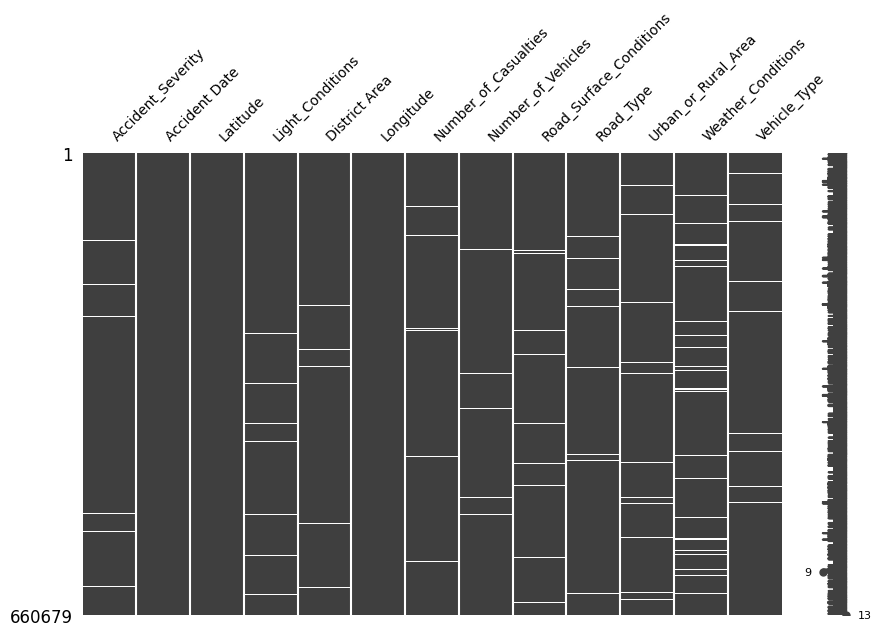

In [306]:
import missingno as msno

msno.matrix(df = df, figsize = (10, 6), fontsize = 10)

<Axes: >

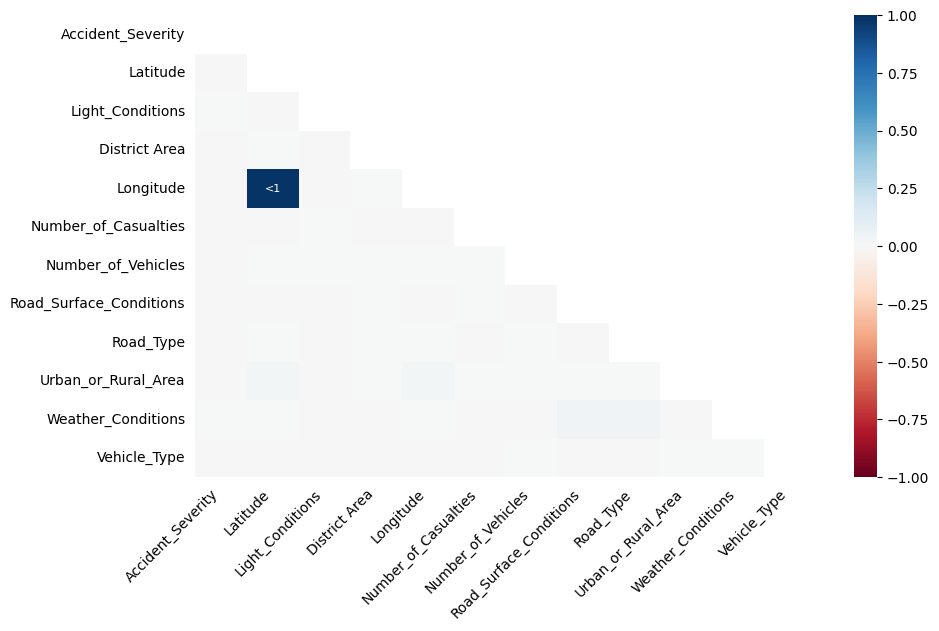

In [307]:
msno.heatmap(df = df, figsize = (10, 6), fontsize = 10)

We preserved the Longitude, Latitude and Accident Date variables. As I see from here, the lack of variables does not seem to arise from their relationships with each other. Because we created most of the deficiencies manually. 

The only thing we need to pay attention to is that the deficiencies between the Latitude and Longitude variables in the correlations seem to be caused by each other. I will examine this, and then, in case such a situation occurs, I will delete the records that are missing the Latitude and Longitude variables, since the absence of these variables covers a small part of the data set.

In [308]:
len(df[(df["Latitude"].isnull()) & (df["Longitude"].isnull())])

25

While the Latitude variable was missing, the number of observations with missing values ​​for the Longitude variable was 25, and this value is similar to the number of missing values ​​for both variables separately. Therefore, the absence of these two variables is interdependent, which means that when the geographical location where the accident occurred is unknown, information about both components is missing.

**My preference is to delete these record**s.

In [309]:
del1 = df.dropna(subset=["Latitude", "Longitude"])
del1[["Latitude", "Longitude"]].isnull().sum()

Latitude     0
Longitude    0
dtype: int64

In [310]:
df["Latitude"].head()

Index
200701BS64157   51.51
200701BS65737   51.50
200701BS66127   51.52
200701BS66128   51.50
200701BS66837   51.49
Name: Latitude, dtype: float64

In [311]:
df = del1

In [312]:
df.isnull().sum().sort_values(ascending=False)

Weather_Conditions         23720
Road_Type                  14290
Road_Surface_Conditions    10399
Light_Conditions           10086
District Area              10029
Vehicle_Type                9879
Urban_or_Rural_Area         9842
Number_of_Casualties        9832
Number_of_Vehicles          9719
Accident_Severity           9640
Accident Date                  0
Latitude                       0
Longitude                      0
dtype: int64

# Step 3: Editing Class and Feature Names

In [313]:
def cat_classes(dataframe, cat_col):
    print("Column:", cat_col)
    print(f"Number of classes: {dataframe[cat_col].nunique()}", end="\n")
    print(f"Classes: {dataframe[cat_col].unique()}")
    print("#####################")

In [314]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 660653
Variables: 13
cat_cols: : 7
num_cols: : 4
cat_but_car: : 2
num_but_cat: : 0


In [315]:
print("#####################")
for col in cat_cols:
    cat_classes(df, col)

#####################
Column: Accident_Severity
Number of classes: 3
Classes: ['Serious' 'Slight' 'Fatal' nan]
#####################
Column: Light_Conditions
Number of classes: 5
Classes: ['Darkness - lights lit' 'Daylight' 'Darkness - lighting unknown' nan
 'Darkness - lights unlit' 'Darkness - no lighting']
#####################
Column: Road_Surface_Conditions
Number of classes: 5
Classes: ['Dry' 'Wet or damp' nan 'Snow' 'Frost or ice' 'Flood over 3cm. deep']
#####################
Column: Road_Type
Number of classes: 5
Classes: ['Single carriageway' nan 'Dual carriageway' 'One way street' 'Roundabout'
 'Slip road']
#####################
Column: Urban_or_Rural_Area
Number of classes: 3
Classes: ['Urban' nan 'Rural' 'Unallocated']
#####################
Column: Weather_Conditions
Number of classes: 8
Classes: ['Fine no high winds' 'Raining no high winds' nan 'Other'
 'Fine + high winds' 'Raining + high winds' 'Snowing no high winds'
 'Fog or mist' 'Snowing + high winds']
###############

***I decided to edit to replace these classes with shorter expressions.***

## Class Conversion Table
### Light_Conditions
- **Darkness - lights lit** → **Dark (lit)**
- **Daylight** → **Day**
- **Darkness - lighting unknown** → **Dark (unknown)**
- **Darkness - lights unlit** → **Dark (unlit)**
- **Darkness - no lighting** → **Dark (none)**

---

### Road_Surface_Conditions
- **Dry** → **Dry**
- **Wet or damp** → **Wet**
- **Snow** → **Snow**
- **Frost or ice** → **Icy**
- **Flood over 3cm. deep** → **Flood**

---

### Road_Type
- **Single carriageway** → **Single Rd**
- **Dual carriageway** → **Dual Rd**
- **One way street** → **One Way**
- **Roundabout** → **Roundabout**
- **Slip road** → **Slip Rd**

---r
### Weather_Conditions
- **Fine no high winds** → **Fine**
- **Raining no high winds** → **Rain**
- **Fine + high winds** → **Windy**
- **Raining + high winds** → **Stormy**
- **Snowing no high winds** → **Snow**
- **Fog or mist** → **Fog**
- **Snowing + high winds** → **Blizzard**

---

### Vehicle_Type
- **Car** → **Car**
- **Taxi/Private hire car** → **Taxi**
- **Bus or coach (17 or more pass seats)** → **Bus**
- **Van / Goods 3.5 tonnes mgw or under** → **Van**
- **Motorcycle over 125cc and up to 500cc** → **Motorcycle (125-500cc)**
- **Motorcycle 125cc and under** → **Motorcycle (<=125cc)**
- **Motorcycle over 500cc** → **Motorcycle (>500cc)**
- **Motorcycle 50cc and under** → **Motorcycle (<=50cc)**
- **Goods 7.5 tonnes mgw and over** → **Heavy Goods**
- **Pedal cycle** → **Bicycle**
- **Agricultural vehicle** → **Farm Vehicle**
- **Ridden horse** → **Horse**
- **Data missing or out of range** → **Unknown**se** → **Horse**
- **Data missing or out of range** → **Unknown**


In [316]:
df__ = df.copy()

replacement_dict = {
    "Light_Conditions": {
        "Darkness - lights lit": "Dark (lit)",
        "Daylight": "Day",
        "Darkness - lighting unknown": "Dark (unknown)",
        "Darkness - lights unlit": "Dark (unlit)",
        "Darkness - no lighting": "Dark (none)"
    },
    "Road_Surface_Conditions": {
        "Dry": "Dry",
        "Wet or damp": "Wet",
        "Snow": "Snow",
        "Frost or ice": "Icy",
        "Flood over 3cm. deep": "Flood"
    },
    "Road_Type": {
        "Single carriageway": "Single Rd",
        "Dual carriageway": "Dual Rd",
        "One way street": "One Way",
        "Roundabout": "Roundabout",
        "Slip road": "Slip Rd"
    },
    "Weather_Conditions": {
        "Fine no high winds": "Fine",
        "Raining no high winds": "Rain",
        "Fine + high winds": "Windy",
        "Raining + high winds": "Stormy",
        "Snowing no high winds": "Snow",
        "Fog or mist": "Fog",
        "Snowing + high winds": "Blizzard"
    },
    "Vehicle_Type": {
        "Car": "Car",
        "Taxi/Private hire car": "Taxi",
        "Bus or coach (17 or more pass seats)": "Bus",
        "Van / Goods 3.5 tonnes mgw or under": "Van",
        "Motorcycle over 125cc and up to 500cc": "Motorcycle (125-500cc)",
        "Motorcycle 125cc and under": "Motorcycle (<=125cc)",
        "Motorcycle over 500cc": "Motorcycle (>500cc)",
        "Motorcycle 50cc and under": "Motorcycle (<=50cc)",
        "Goods 7.5 tonnes mgw and over": "Heavy Goods",
        'Goods over 3.5t. and under 7.5t': 'Medium Goods 3.5-7.5t',
        "Pedal cycle": "Bicycle",
        'Minibus (8 - 16 passenger seats)': 'Minibus',
        "Agricultural vehicle": "Farm Vehicle",
        "Ridden horse": "Horse",
        "Data missing or out of range": "Unknown"
    }
}

# Updating Class Names
for column, mapping in replacement_dict.items():
    if column in df__.columns:
        df__[column] = df__[column].replace(mapping)

In [317]:
# Control Result
df__.head(3)

,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
Index,,,,,,,,,,,,,
200701BS64157,Serious,05-06-2019,51.51,Dark (lit),Kensington and Chelsea,-0.21,1.00,2.00,Dry,Single Rd,Urban,Fine,Car
200701BS65737,Serious,02-07-2019,51.50,Day,Kensington and Chelsea,-0.17,1.00,2.00,Wet,Single Rd,Urban,Rain,Car
200701BS66127,Serious,26-08-2019,51.52,Dark (unknown),Kensington and Chelsea,-0.21,1.00,3.00,Dry,NaN,Urban,NaN,Taxi


In [318]:
df = df__

**Column Name Conversions**

In [319]:
new_column_names = {
    "Accident Date": "Accident_Date",
    "District Area": "District_Area",
}

df.rename(columns=new_column_names, inplace=True)

In [320]:
df.head(1)

,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
Index,,,,,,,,,,,,,
200701BS64157,Serious,05-06-2019,51.51,Dark (lit),Kensington and Chelsea,-0.21,1.00,2.00,Dry,Single Rd,Urban,Fine,Car


# Step 4: Manipulating The Missing Values

In [321]:
df.isnull().sum().sort_values(ascending=False)

Weather_Conditions         23720
Road_Type                  14290
Road_Surface_Conditions    10399
Light_Conditions           10086
District_Area              10029
Vehicle_Type                9879
Urban_or_Rural_Area         9842
Number_of_Casualties        9832
Number_of_Vehicles          9719
Accident_Severity           9640
Accident_Date                  0
Latitude                       0
Longitude                      0
dtype: int64

In [322]:
def missing_rate(dataframe, col):
    return (len(dataframe[dataframe[col].isnull()]) / len(dataframe)) * 100

**Manipulating Categorical NaN Columns**

In [323]:
print("Missing Rates")
for col in cat_cols:
    print(f"{col}:","%.2f" % missing_rate(df, col))

Missing Rates
Accident_Severity: 1.46
Light_Conditions: 1.53
Road_Surface_Conditions: 1.57
Road_Type: 2.16
Urban_or_Rural_Area: 1.49
Weather_Conditions: 3.59
Vehicle_Type: 1.50


In [324]:
for col in cat_cols:
    if missing_rate(df, col) > 1.50:
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df.dropna(subset=col, inplace=True)

/tmp/ipykernel_30/3001432860.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipykernel_30/3001432860.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [325]:
print("Missing Rates")
for col in cat_cols:
    print(f"{col}:", "%.2f" % missing_rate(df, col))

Missing Rates
Accident_Severity: 0.00
Light_Conditions: 0.00
Road_Surface_Conditions: 0.00
Road_Type: 0.00
Urban_or_Rural_Area: 0.00
Weather_Conditions: 0.00
Vehicle_Type: 0.00


In [326]:
df.shape

(631703, 13)

In [327]:
df.isnull().sum()

Accident_Severity             0
Accident_Date                 0
Latitude                      0
Light_Conditions              0
District_Area              9601
Longitude                     0
Number_of_Casualties       9409
Number_of_Vehicles         9286
Road_Surface_Conditions       0
Road_Type                     0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

In [328]:
missing_rate(df, "District_Area")

1.5198598075361365

I want to delete NaN values in District_Area column because there is a homogeneous distribution between classes and I do not want to generalize.

In [329]:
df.dropna(subset="District_Area", inplace=True)

In [330]:
missing_rate(df, "District_Area")

0.0

I filled with mode for the categorical columns whose rate of missing value is greater than %1.5. Other categorical columns was deleted.

**Manipulating Numerical NaN Columns**

In [331]:
num_cols

['Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles']

In [332]:
missing_rate(df, "Number_of_Casualties")

1.491234556391074

In [333]:
missing_rate(df, "Number_of_Vehicles")

1.4700161709816075

In [334]:
for col in ["Number_of_Casualties", "Number_of_Vehicles"]:
    df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipykernel_30/2837309861.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [335]:
df.isnull().sum()

Accident_Severity          0
Accident_Date              0
Latitude                   0
Light_Conditions           0
District_Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

The Dataset is completely full.

# Step 5: Outliers

In [336]:
num_cols

['Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles']

In [337]:
def outlier_thresholds(dataframe, col, q1=0.25, q3=0.75):
    q1 = dataframe[col].quantile(q1)
    q3 = dataframe[col].quantile(q3)
    iqr = q3 - q1
    up_limit = q3 + 1.5 * iqr
    low_limit = q1 - 1.5 * iqr
    print(f"{col} Quantiles\nq1 = {q1}, q3 = {q3}")
    return low_limit, up_limit

In [338]:
# Number_of_Casualties
low, up = outlier_thresholds(df, "Number_of_Casualties", q1=0.01, q3=0.99)

Number_of_Casualties Quantiles
q1 = 1.0, q3 = 5.0


In [339]:
print("Low:", low)
print("Up:", up)

Low: -5.0
Up: 11.0


In [340]:
num_summary(df, "Number_of_Casualties")

count   622102.00
mean         1.36
std          0.81
min          1.00
5%           1.00
10%          1.00
20%          1.00
30%          1.00
40%          1.00
50%          1.00
60%          1.00
70%          1.00
80%          2.00
90%          2.00
95%          3.00
99%          5.00
max         68.00
Name: Number_of_Casualties, dtype: float64


In [341]:
df[(df["Number_of_Casualties"] > 20) | (df["Number_of_Casualties"] < low)]["Number_of_Casualties"]

Index
200701YE80124   40.00
200704BC07088   22.00
200704TA07199   25.00
200705EE20120   28.00
2.01E+12        22.00
2007170H10937   29.00
200722EA86846   22.00
200743N002017   68.00
2.01E+12        29.00
2.01E+12        22.00
200763CP26107   29.00
200805FF25077   32.00
2.01E+12        21.00
2.01E+12        45.00
2.01E+12        47.00
2.01E+12        28.00
2.01E+12        21.00
200937L017392   27.00
200942I065903   21.00
200950AH2T013   48.00
2.01E+12        21.00
2.01E+12        40.00
201011SJ00580   26.00
2.01E+12        24.00
201030D000150   22.00
2.01E+12        42.00
201063BC21310   43.00
Name: Number_of_Casualties, dtype: float64

In [342]:
df = df[~((df["Number_of_Casualties"] > 20) | (df["Number_of_Casualties"] < low))]

In [343]:
df[(df["Number_of_Casualties"] > up) | (df["Number_of_Casualties"] < low)]["Number_of_Casualties"].mean()

14.347826086956522

In [344]:
df.loc[(df["Number_of_Casualties"] > up) | (df["Number_of_Casualties"] < low), "Number_of_Casualties"] = 12

In [345]:
# Number_of_Vehicles
low, up = outlier_thresholds(df, "Number_of_Vehicles", q1=0.01, q3=0.99)

Number_of_Vehicles Quantiles
q1 = 1.0, q3 = 4.0


In [346]:
print("Low:", low)
print("Up:", up)

Low: -3.5
Up: 8.5


In [347]:
num_summary(df, "Number_of_Vehicles")

count   622075.00
mean         1.83
std          0.71
min          1.00
5%           1.00
10%          1.00
20%          1.00
30%          1.83
40%          2.00
50%          2.00
60%          2.00
70%          2.00
80%          2.00
90%          3.00
95%          3.00
99%          4.00
max         32.00
Name: Number_of_Vehicles, dtype: float64


In [348]:
df = df[~((df["Number_of_Vehicles"] > 15) | (df["Number_of_Vehicles"] < low))]
df.loc[(df["Number_of_Vehicles"] > up) | (df["Number_of_Vehicles"] < low), "Number_of_Vehicles"] = 10

**Since outliers do not represent the overall information, I removed these values ​​from the data or suppressed them with a value closer to the threshold value.**

# Step 6: Analyses

**Categorical Analyses**

In [349]:
cat_cols

['Accident_Severity',
 'Light_Conditions',
 'Road_Surface_Conditions',
 'Road_Type',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Vehicle_Type']

- Light_Conditions

In [350]:
cat_summary(df, "Light_Conditions")

                  Light_Conditions  Ratio
Light_Conditions                         
Day                         458939  73.78
Dark (lit)                  120041  19.30
Dark (none)                  34689   5.58
Dark (unknown)                6026   0.97
Dark (unlit)                  2374   0.38
##########################################


The distribution of classes is as follows.

In [351]:
df.groupby("Light_Conditions")["Accident_Severity"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

Light_Conditions
Dark (lit)        Slight
Dark (none)       Slight
Dark (unknown)    Slight
Dark (unlit)      Slight
Day               Slight
Name: Accident_Severity, dtype: object

When we consider the light conditions, the accidents that occur in all kinds of light conditions are more slight.

In [352]:
target_summary_with_cat(df, "Number_of_Casualties", "Light_Conditions")

                  TARGET_MEAN
Light_Conditions             
Dark (lit)               1.37
Dark (none)              1.54
Dark (unknown)           1.31
Dark (unlit)             1.33
Day                      1.34


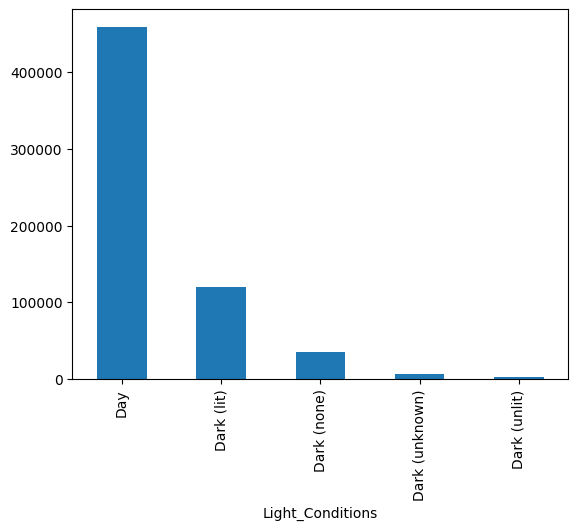

In [353]:
df["Light_Conditions"].value_counts().plot(kind="bar")
plt.show()

Most accidents usually occur during daylight hours.

- Road_Surface_Conditions

In [354]:
cat_summary(df, "Road_Surface_Conditions")

                         Road_Surface_Conditions  Ratio
Road_Surface_Conditions                                
Dry                                       425236  68.36
Wet                                       173194  27.84
Icy                                        17209   2.77
Snow                                        5477   0.88
Flood                                        953   0.15
##########################################


In [355]:
df.groupby("Road_Surface_Conditions")["Accident_Severity"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

Road_Surface_Conditions
Dry      Slight
Flood    Slight
Icy      Slight
Snow     Slight
Wet      Slight
Name: Accident_Severity, dtype: object

In [356]:
target_summary_with_cat(df, "Number_of_Casualties", "Road_Surface_Conditions")

                         TARGET_MEAN
Road_Surface_Conditions             
Dry                             1.33
Flood                           1.49
Icy                             1.34
Snow                            1.36
Wet                             1.41


The number of injured people was higher if the road conditions were wet or icy.

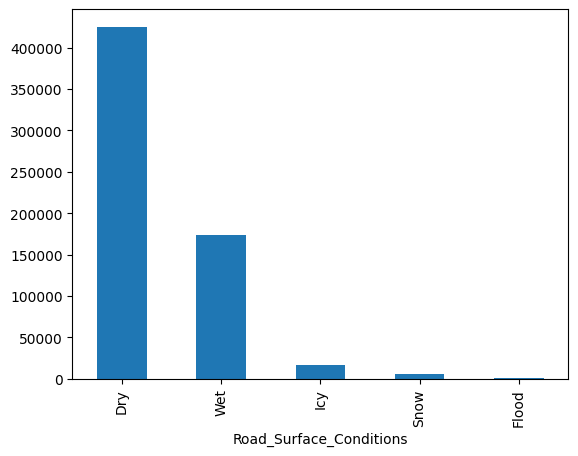

In [357]:
df["Road_Surface_Conditions"].value_counts().plot(kind="bar")
plt.show()

- Road_Type

In [358]:
cat_summary(df, "Road_Type")

            Road_Type  Ratio
Road_Type                   
Single Rd      470009  75.56
Dual Rd         92211  14.82
Roundabout      40763   6.55
One Way         12559   2.02
Slip Rd          6527   1.05
##########################################


In [359]:
df.groupby("Road_Type")["Accident_Severity"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

Road_Type
Dual Rd       Slight
One Way       Slight
Roundabout    Slight
Single Rd     Slight
Slip Rd       Slight
Name: Accident_Severity, dtype: object

In [360]:
target_summary_with_cat(df, "Number_of_Casualties", "Road_Type")

            TARGET_MEAN
Road_Type              
Dual Rd            1.47
One Way            1.20
Roundabout         1.28
Single Rd          1.34
Slip Rd            1.41


The number of injured people was higher in accidents that occurred on dual roads.

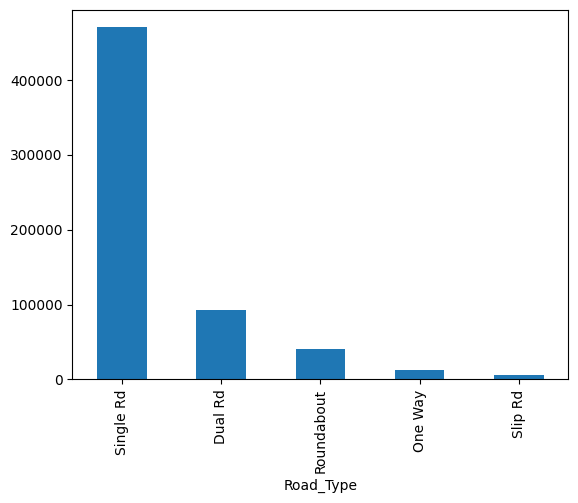

In [361]:
df["Road_Type"].value_counts().plot(kind="bar")
plt.show()

- Urban_or_Rural_Area

In [362]:
cat_summary(df, "Urban_or_Rural_Area")

                     Urban_or_Rural_Area  Ratio
Urban_or_Rural_Area                            
Urban                             397164  63.85
Rural                             224902  36.15
Unallocated                            3   0.00
##########################################


In [363]:
target_summary_with_cat(df, "Number_of_Casualties", "Urban_or_Rural_Area")

                     TARGET_MEAN
Urban_or_Rural_Area             
Rural                       1.47
Unallocated                 1.00
Urban                       1.29


The number of injured people in rural areas is higher.

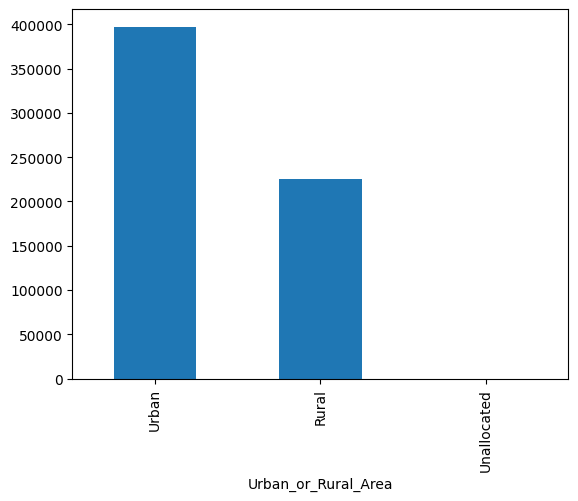

In [364]:
df["Urban_or_Rural_Area"].value_counts().plot(kind="bar")
plt.show()

- Weather_Conditions

In [365]:
cat_summary(df, "Weather_Conditions")

                    Weather_Conditions  Ratio
Weather_Conditions                           
Fine                            505480  81.26
Rain                             73920  11.88
Other                            15934   2.56
Stormy                            8907   1.43
Windy                             7916   1.27
Snow                              5799   0.93
Fog                               3285   0.53
Blizzard                           828   0.13
##########################################


The accidents generally occurred in good weather conditions.

In [366]:
target_summary_with_cat(df, "Number_of_Casualties", "Weather_Conditions")

                    TARGET_MEAN
Weather_Conditions             
Blizzard                   1.43
Fine                       1.35
Fog                        1.44
Other                      1.35
Rain                       1.41
Snow                       1.34
Stormy                     1.42
Windy                      1.39


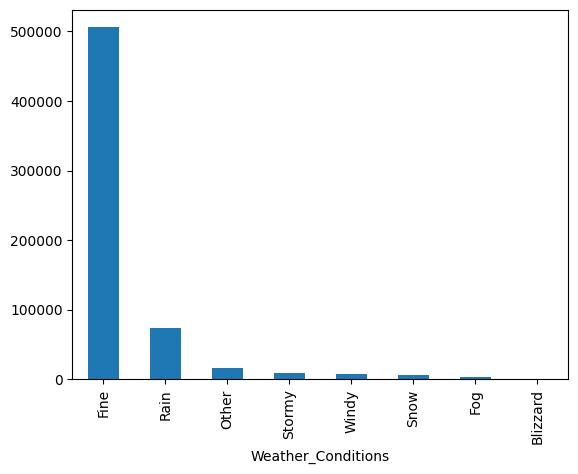

In [367]:
df["Weather_Conditions"].value_counts().plot(kind="bar")
plt.show()

- Vehicle_Type

In [368]:
cat_summary(df, "Vehicle_Type")

                        Vehicle_Type  Ratio
Vehicle_Type                               
Car                           468891  75.38
Van                            32178   5.17
Bus                            24340   3.91
Motorcycle (>500cc)            24139   3.88
Heavy Goods                    16278   2.62
Motorcycle (<=125cc)           14357   2.31
Taxi                           12547   2.02
Motorcycle (125-500cc)          7225   1.16
Motorcycle (<=50cc)             7187   1.16
Medium Goods 3.5-7.5t           5729   0.92
Other vehicle                   5316   0.85
Minibus                         1845   0.30
Farm Vehicle                    1839   0.30
Bicycle                          189   0.03
Unknown                            5   0.00
Horse                              4   0.00
##########################################


In [369]:
target_summary_with_cat(df, "Number_of_Casualties", "Vehicle_Type")

                        TARGET_MEAN
Vehicle_Type                       
Bicycle                        1.38
Bus                            1.35
Car                            1.36
Farm Vehicle                   1.34
Heavy Goods                    1.35
Horse                          1.25
Medium Goods 3.5-7.5t          1.35
Minibus                        1.35
Motorcycle (125-500cc)         1.34
Motorcycle (<=125cc)           1.34
Motorcycle (<=50cc)            1.34
Motorcycle (>500cc)            1.36
Other vehicle                  1.34
Taxi                           1.37
Unknown                        1.60
Van                            1.35


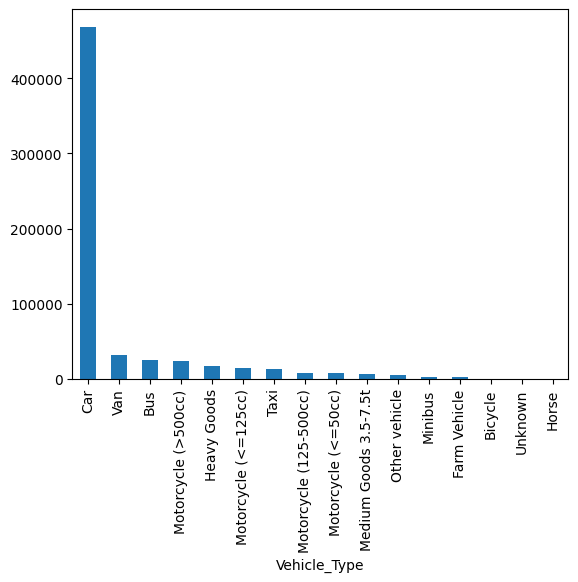

In [370]:
df["Vehicle_Type"].value_counts().plot(kind="bar")
plt.show()

**Numerical Analyses**

In [371]:
num_cols

['Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles']

- Latitude

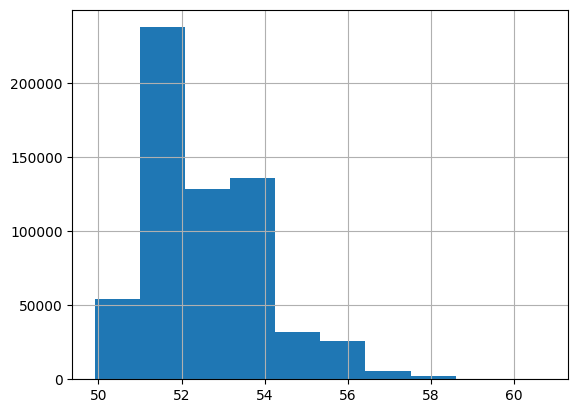

In [373]:
df["Latitude"].hist()
plt.show()

- Longitude

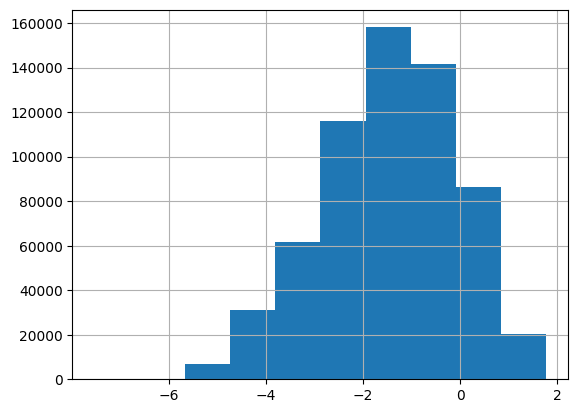

In [374]:
df["Longitude"].hist()
plt.show()

Latitude: 52

Longitude: -1

There is density in these values, that is, these accidents generally include accident records in the UK.

- Number_of_Vehicles

In [375]:
num_summary(df, "Number_of_Vehicles")

count   622069.00
mean         1.83
std          0.71
min          1.00
5%           1.00
10%          1.00
20%          1.00
30%          1.83
40%          2.00
50%          2.00
60%          2.00
70%          2.00
80%          2.00
90%          3.00
95%          3.00
99%          4.00
max         10.00
Name: Number_of_Vehicles, dtype: float64


This data includes records where the number of vehicles involved in the accident is generally less than 5.

In [376]:
target_summary_with_num(df, "Number_of_Casualties", "Number_of_Vehicles")

                      Number_of_Vehicles
Number_of_Casualties                    
1.00                                1.74
1.36                                1.83
2.00                                2.04
3.00                                2.21
4.00                                2.27
5.00                                2.41
6.00                                2.67
7.00                                2.80
8.00                                2.97
9.00                                3.09
10.00                               3.40
11.00                               2.93
12.00                               2.88




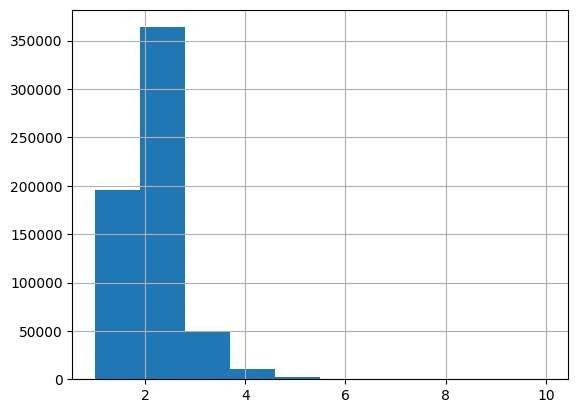

In [377]:
df["Number_of_Vehicles"].hist()
plt.show()

**Boxplots**

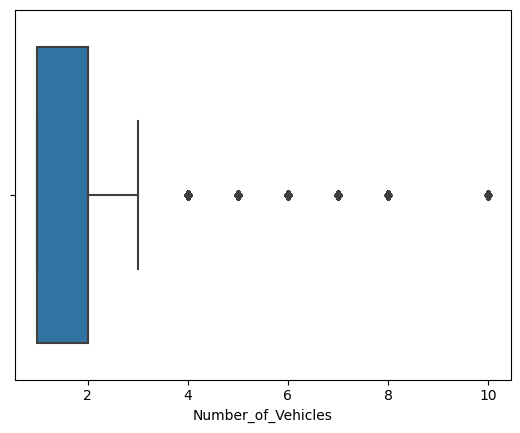

In [383]:
sns.boxplot(x=df["Number_of_Vehicles"])
plt.show()

# Step 7: Correlation

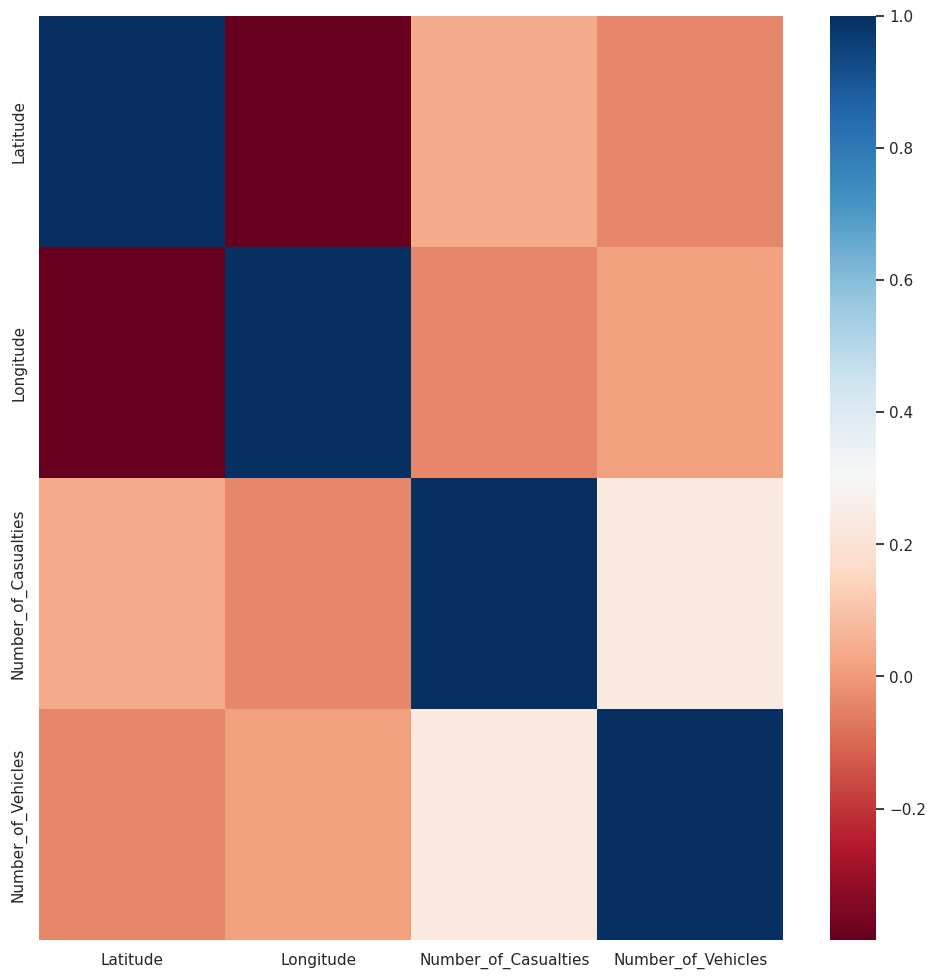

In [384]:
corr = df[num_cols].corr()
sns.set(rc={"figure.figsize": (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

There don't seem to be many columns related to each other. Later, we will add encoded categories.

# Step 8: Feature Extraction

In [385]:
df.head()

,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
Index,,,,,,,,,,,,,
200701BS64157,Serious,05-06-2019,51.51,Dark (lit),Kensington and Chelsea,-0.21,1.00,2.00,Dry,Single Rd,Urban,Fine,Car
200701BS65737,Serious,02-07-2019,51.50,Day,Kensington and Chelsea,-0.17,1.00,2.00,Wet,Single Rd,Urban,Rain,Car
200701BS66127,Serious,26-08-2019,51.52,Dark (unknown),Kensington and Chelsea,-0.21,1.00,3.00,Dry,Single Rd,Urban,Fine,Taxi
200701BS66128,Serious,16-08-2019,51.50,Day,Kensington and Chelsea,-0.20,1.00,4.00,Dry,Single Rd,Urban,Fine,Bus
200701BS66837,Slight,03-09-2019,51.49,Dark (lit),Kensington and Chelsea,-0.19,1.00,2.00,Dry,Single Rd,Urban,Fine,Other vehicle


In [386]:
df['Is_Night'] = df['Light_Conditions'].apply(lambda x: 1 if x in ['Dark (none)', 'Dark (lit)', 'Dark (unlit)', 'Dark (unknown)'] else 0)

In [387]:
def categorize_casualties(casualties):
    if casualties == 0:
        return 'No Casualties'
    elif 1 <= casualties <= 2:
        return '1-2 Casualties'
    elif 3 <= casualties <= 5:
        return '3-5 Casualties'
    else:
        return '6+ Casualties'

df['Casualty_Category'] = df['Number_of_Casualties'].apply(categorize_casualties)

In [388]:
df['Severe_Weather'] = df['Weather_Conditions'].apply(lambda x: 1 if x in ['Stormy', 'Rain', 'Fog', 'Blizzard'] else 0)

In [390]:
def group_vehicle_type(vehicle_type):
    if 'Motorcycle' in vehicle_type:
        return 'Motorcycle'
    elif 'Car' in vehicle_type:
        return 'Car'
    elif 'Van' in vehicle_type:
        return 'Van'
    elif 'Bus' in vehicle_type:
        return 'Bus'
    else:
        return 'Other'

df['Vehicle_Type_Grouped'] = df['Vehicle_Type'].apply(group_vehicle_type)

In [392]:
df['Accident_Date'] = pd.to_datetime(df['Accident_Date'], format='%d-%m-%Y')

In [396]:
df['Year'] = df['Accident_Date'].dt.year
df['Month'] = df['Accident_Date'].dt.month

In [397]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)

In [398]:
def injury_severity(injuries):
    if injuries == 0:
        return 'No Injuries'
    elif 1 <= injuries <= 2:
        return 'Minor Injuries'
    elif 3 <= injuries <= 5:
        return 'Moderate Injuries'
    else:
        return 'Severe Injuries'

df['Injury_Severity'] = df['Number_of_Casualties'].apply(injury_severity)

In [399]:
df.head()

,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Is_Night,Casualty_Category,Severe_Weather,Vehicle_Type_Grouped,Year,Month,Season,Injury_Severity
Index,,,,,,,,,,,,,,,,,,,,,
200701BS64157,Serious,2019-06-05,51.51,Dark (lit),Kensington and Chelsea,-0.21,1.00,2.00,Dry,Single Rd,Urban,Fine,Car,1,1-2 Casualties,0,Car,2019,6,Summer,Minor Injuries
200701BS65737,Serious,2019-07-02,51.50,Day,Kensington and Chelsea,-0.17,1.00,2.00,Wet,Single Rd,Urban,Rain,Car,0,1-2 Casualties,1,Car,2019,7,Summer,Minor Injuries
200701BS66127,Serious,2019-08-26,51.52,Dark (unknown),Kensington and Chelsea,-0.21,1.00,3.00,Dry,Single Rd,Urban,Fine,Taxi,1,1-2 Casualties,0,Other,2019,8,Summer,Minor Injuries
200701BS66128,Serious,2019-08-16,51.50,Day,Kensington and Chelsea,-0.20,1.00,4.00,Dry,Single Rd,Urban,Fine,Bus,0,1-2 Casualties,0,Bus,2019,8,Summer,Minor Injuries
200701BS66837,Slight,2019-09-03,51.49,Dark (lit),Kensington and Chelsea,-0.19,1.00,2.00,Dry,Single Rd,Urban,Fine,Other vehicle,1,1-2 Casualties,0,Other,2019,9,Autumn,Minor Injuries


# Step 9: One-Hot Encoding

In [416]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 622069
Variables: 21
cat_cols: : 13
num_cols: : 4
cat_but_car: : 1
num_but_cat: : 2


In [417]:
cat_cols

['Accident_Severity',
 'Light_Conditions',
 'Road_Surface_Conditions',
 'Road_Type',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Vehicle_Type',
 'Casualty_Category',
 'Vehicle_Type_Grouped',
 'Season',
 'Injury_Severity',
 'Is_Night',
 'Severe_Weather']

In [420]:
cols = ['Light_Conditions', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 
        'Weather_Conditions', 'Vehicle_Type', 'Casualty_Category', 'Vehicle_Type_Grouped', 'Season',
        'Injury_Severity']

df = pd.get_dummies(df, columns=cols, drop_first=True, dtype=int)

In [421]:
df.head()

,Accident_Severity,Accident_Date,Latitude,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Is_Night,Severe_Weather,Year,Month,Light_Conditions_Dark (none),Light_Conditions_Dark (unknown),Light_Conditions_Dark (unlit),Light_Conditions_Day,Road_Surface_Conditions_Flood,Road_Surface_Conditions_Icy,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet,Road_Type_One Way,Road_Type_Roundabout,Road_Type_Single Rd,Road_Type_Slip Rd,Urban_or_Rural_Area_Unallocated,Urban_or_Rural_Area_Urban,Weather_Conditions_Fine,Weather_Conditions_Fog,Weather_Conditions_Other,Weather_Conditions_Rain,Weather_Conditions_Snow,Weather_Conditions_Stormy,Weather_Conditions_Windy,Vehicle_Type_Bus,Vehicle_Type_Car,Vehicle_Type_Farm Vehicle,Vehicle_Type_Heavy Goods,Vehicle_Type_Horse,Vehicle_Type_Medium Goods 3.5-7.5t,Vehicle_Type_Minibus,Vehicle_Type_Motorcycle (125-500cc),Vehicle_Type_Motorcycle (<=125cc),Vehicle_Type_Motorcycle (<=50cc),Vehicle_Type_Motorcycle (>500cc),Vehicle_Type_Other vehicle,Vehicle_Type_Taxi,Vehicle_Type_Unknown,Vehicle_Type_Van,Casualty_Category_3-5 Casualties,Casualty_Category_6+ Casualties,Vehicle_Type_Grouped_Car,Vehicle_Type_Grouped_Motorcycle,Vehicle_Type_Grouped_Other,Vehicle_Type_Grouped_Van,Season_Spring,Season_Summer,Season_Winter,Injury_Severity_Moderate Injuries,Injury_Severity_Severe Injuries
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200701BS64157,Serious,2019-06-05,51.51,Kensington and Chelsea,-0.21,1.00,2.00,1,0,2019,6,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
200701BS65737,Serious,2019-07-02,51.50,Kensington and Chelsea,-0.17,1.00,2.00,0,1,2019,7,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
200701BS66127,Serious,2019-08-26,51.52,Kensington and Chelsea,-0.21,1.00,3.00,1,0,2019,8,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
200701BS66128,Serious,2019-08-16,51.50,Kensington and Chelsea,-0.20,1.00,4.00,0,0,2019,8,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
200701BS66837,Slight,2019-09-03,51.49,Kensington and Chelsea,-0.19,1.00,2.00,1,0,2019,9,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [422]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 622069
Variables: 58
cat_cols: : 50
num_cols: : 4
cat_but_car: : 1
num_but_cat: : 49


In [424]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["float", "int"]]

In [426]:
num_cols = num_cols + num_but_cat

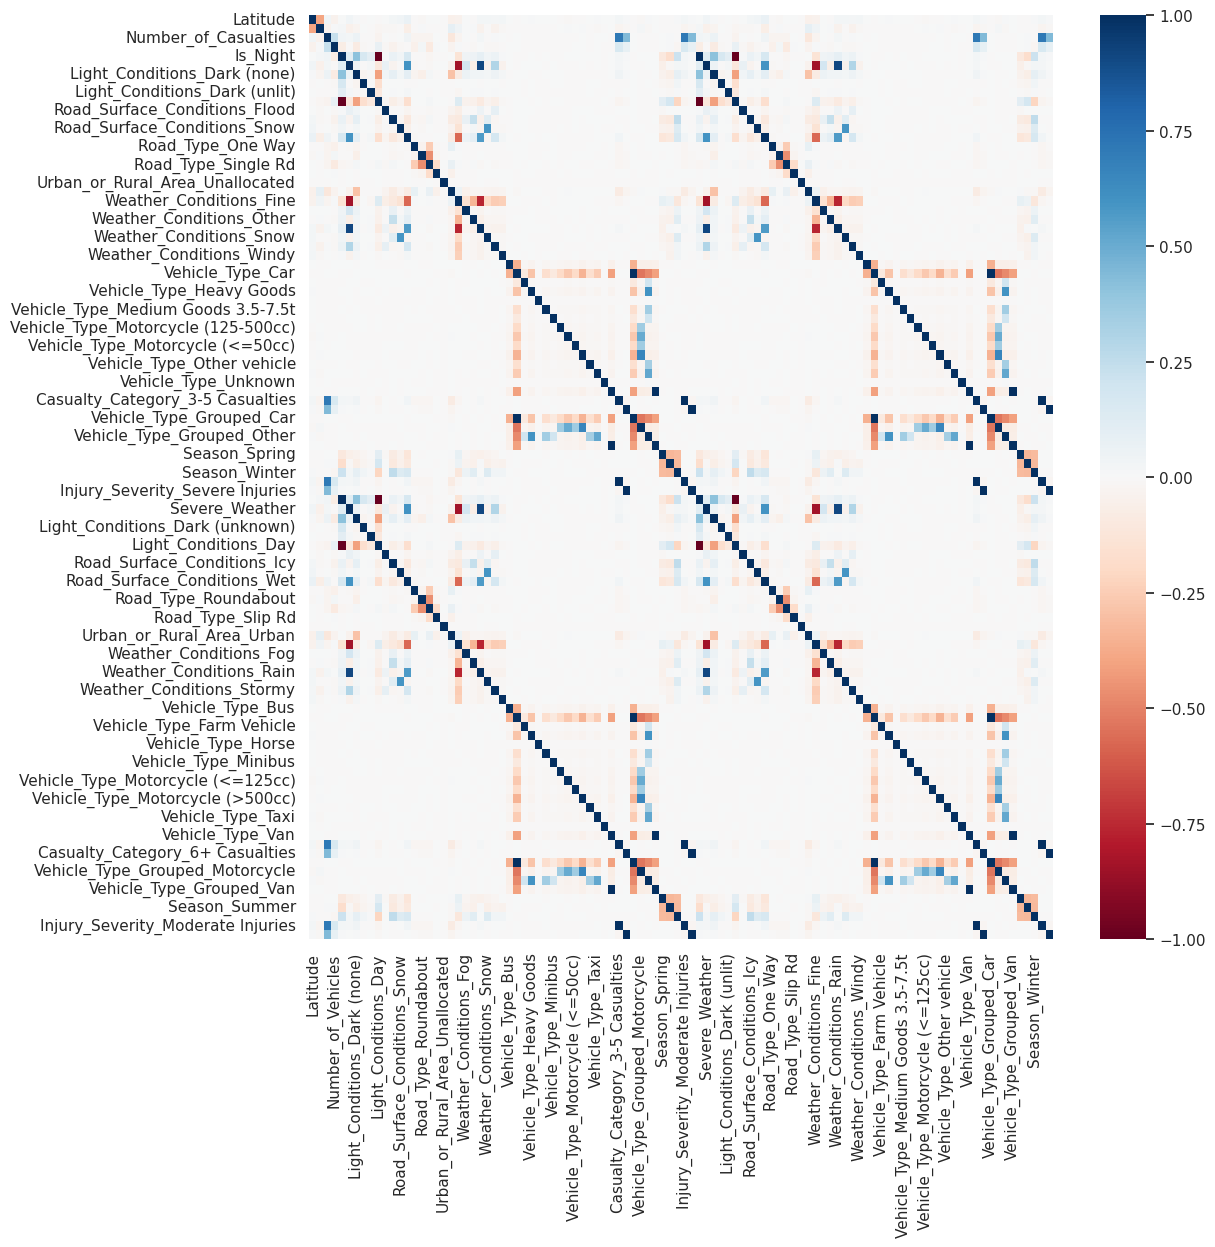

In [428]:
corr = df[num_cols].corr()
sns.set(rc={"figure.figsize": (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

# Step 10: Base Model

In [429]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622069 entries, 200701BS64157 to 201091NM02142
Data columns (total 58 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Accident_Severity                    622069 non-null  object        
 1   Accident_Date                        622069 non-null  datetime64[ns]
 2   Latitude                             622069 non-null  float64       
 3   District_Area                        622069 non-null  object        
 4   Longitude                            622069 non-null  float64       
 5   Number_of_Casualties                 622069 non-null  float64       
 6   Number_of_Vehicles                   622069 non-null  float64       
 7   Is_Night                             622069 non-null  int64         
 8   Severe_Weather                       622069 non-null  int64         
 9   Year                                 622069 non-null  in

In [435]:
X = df.drop(["Number_of_Casualties", "Accident_Severity", "District_Area", "Accident_Date"], axis=1)
y = df[["Number_of_Casualties"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [436]:
reg_model = LinearRegression().fit(X_train, y_train)

In [437]:
y_pred = reg_model.predict(X_test)

In [438]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.4082660524302031

In [439]:
df["Number_of_Casualties"].std()

0.7813331953377433

In [462]:
reg_model.score(X_test, y_test)

0.7272980500853244